In [187]:
import pandas as pd
import seaborn as sns
import matplotlib as plt
from warnings import filterwarnings
%matplotlib inline
filterwarnings('ignore')

import numpy as np
from scipy.stats import ttest_ind, ttest_ind_from_stats
from scipy.special import stdtr
from statistics import mean, stdev
from math import sqrt

In [188]:
df = pd.read_csv('Pies vs Waffles_May 3, 2018_21.52 2.csv', skiprows = [0,1])

In [189]:
print("Total Number of Surveys = ", len(df))

Total Number of Surveys =  210


In [191]:
# rename columns
old_names = df.columns
new_names = []
for old_name in old_names:
    new_name = eval(old_name)['ImportId']
    new_names.append(new_name)
    
df.columns = new_names

Text(0.5,1,'Distribution of Time Taken to Complete Surveys')

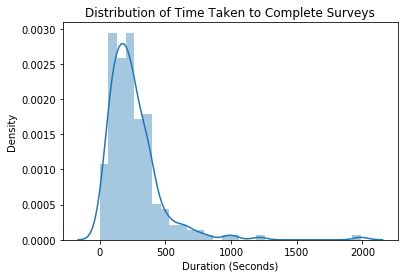

In [192]:
# plot time taken to complete each survey
ax = sns.distplot(df['duration'])
ax.set(xlabel='Duration (Seconds)', ylabel='Density')
ax.set_title("Distribution of Time Taken to Complete Surveys")

## Question 1

### Does the perception of one slice/area depend on the size of the other slices/areas?

In [193]:
def exact_accuracy(df,correct_answer):
    df = pd.DataFrame(df)
    df.columns = ['value']
    correct = len(df[(df['value'] == correct_answer)])
    return correct/len(df)

def accuracy(df,correct_answer,n):
    df = pd.DataFrame(df)
    df.columns = ['value']
    correct = len(df.loc[df['value'].isin(range(correct_answer - n,correct_answer + n + 1))])
    return correct/len(df)

def cohens_d(pie, waffle):
    c0 = np.asarray(pie)
    c1 = np.asarray(waffle)
    cohens_d = (mean(c0) - mean(c1)) / (sqrt((stdev(c0) ** 2 + stdev(c1) ** 2) / 2))
    return cohens_d
    

In [194]:
pie1 = df[(df['QID1_1'].notnull())]['QID1_1']
pie2 = df[(df['QID3_1'].notnull())]['QID3_1']
pie3 = df[(df['QID4_1'].notnull())]['QID4_1']
pie4 = df[(df['QID5_1'].notnull())]['QID5_1']
pies = [pie1, pie2, pie3, pie4]
waffle1 = df[(df['QID7_1'].notnull())]['QID7_1']
waffle2 = df[(df['QID8_1'].notnull())]['QID8_1']
waffle3 = df[(df['QID9_1'].notnull())]['QID9_1']
waffle4 = df[(df['QID10_1'].notnull())]['QID10_1']
waffles = [waffle1, waffle2, waffle3, waffle4]

In [195]:
for i in range(len(pies)):
    pie = pies[i]
    waffle = waffles[i]
    t, p = ttest_ind(pie, waffle, equal_var= True)
    cohen = cohens_d(pie,waffle)
    print("Option ",i+1)
    print("ttest_ind:            t = %g  p = %g" % (t, p))
    print("cohen's d: ", cohen)

    
    print("Pie Exact Accuracy: ", exact_accuracy(pie,14))
    print("Waffle Exact Accuracy: ", exact_accuracy(waffle,14))
    print('\n')

    print('Pie Accuracy within 2 units: ', accuracy(pie,14,2))
    print('Waffle Accuracy within 2 units: ', accuracy(waffle,14,2))

    print("******************************")

Option  1
ttest_ind:            t = -0.36102  p = 0.719002
cohen's d:  -0.07880321382387548
Pie Exact Accuracy:  0.05
Waffle Exact Accuracy:  0.4666666666666667


Pie Accuracy within 2 units:  0.425
Waffle Accuracy within 2 units:  0.6222222222222222
******************************
Option  2
ttest_ind:            t = 1.25  p = 0.214854
cohen's d:  0.2769648261581617
Pie Exact Accuracy:  0.0625
Waffle Exact Accuracy:  0.7222222222222222


Pie Accuracy within 2 units:  0.3333333333333333
Waffle Accuracy within 2 units:  0.8055555555555556
******************************
Option  3
ttest_ind:            t = 0.778461  p = 0.438921
cohen's d:  0.18217193737817916
Pie Exact Accuracy:  0.0625
Waffle Exact Accuracy:  0.55


Pie Accuracy within 2 units:  0.40625
Waffle Accuracy within 2 units:  0.65
******************************
Option  4
ttest_ind:            t = 0.217952  p = 0.827944
cohen's d:  0.044834330848297604
Pie Exact Accuracy:  0.06666666666666667
Waffle Exact Accuracy:  0.62


Pie Ac

## Question 2 : Total number of observations

In [199]:
pie1000 = df[(df['QID13_1'].notnull())]['QID13_1']
pie874 = df[(df['QID14_1'].notnull())]['QID14_1']
pies = [pie1000,pie874]
waffle1000 = df[(df['QID18_1'].notnull())]['QID18_1']
waffle874 = df[(df['QID19_1'].notnull())]['QID19_1']
waffles = [waffle1000,waffle874]

In [207]:
for i in range(len(pies)):
    pie = pies[i]
    waffle = waffles[i]
    t, p = ttest_ind(pie, waffle, equal_var= True)
    cohen = cohens_d(pie,waffle)
    if i == 0:
        print("N = ",1000)
        correct = 140
    else:
        print("N = ", 874)
        correct = round(0.14*874)

    print("ttest_ind:            t = %g  p = %g" % (t, p))
    print("cohen's d: ", cohen)

    
    print("Pie Exact Accuracy: ", exact_accuracy(pie,correct))
    print("Waffle Exact Accuracy: ", exact_accuracy(waffle,correct))
    print('\n')

    print('Pie Accuracy within 2 units: ', accuracy(pie,correct,2))
    print('Waffle Accuracy within 2 units: ', accuracy(waffle,correct,2))

    print("******************************")

N =  1000
ttest_ind:            t = 1.61327  p = 0.108955
cohen's d:  0.2721334444241711
Pie Exact Accuracy:  0.013888888888888888
Waffle Exact Accuracy:  0.0


Pie Accuracy within 2 units:  0.1111111111111111
Waffle Accuracy within 2 units:  0.42028985507246375
******************************
N =  874
ttest_ind:            t = -0.078563  p = 0.937505
cohen's d:  -0.013906615254077681
Pie Exact Accuracy:  0.014705882352941176
Waffle Exact Accuracy:  0.18333333333333332


Pie Accuracy within 2 units:  0.058823529411764705
Waffle Accuracy within 2 units:  0.26666666666666666
******************************


## Question 3 : Adjacent

In [ ]:
p1 = df[(df['QID23_1'].notnull())]['QID23_1']
p2 = df[(df['QID28_1'].notnull())]['QID28_1']
p3 = df[(df['QID29_1'].notnull())]['QID29_1']
p4 = df[(df['QID30_1'].notnull())]['QID30_1']
p5 = df[(df['QID31_1'].notnull())]['QID31_1']

w1 = df[(df['QID32_1'].notnull())]['QID32_1']
w2 = df[(df['QID33_1'].notnull())]['QID33_1']
w3 = df[(df['QID34_1'].notnull())]['QID34_1']
w4 = df[(df['QID35_1'].notnull())]['QID35_1']
w5 = df[(df['QID36_1'].notnull())]['QID36_1']








In [210]:
new_names

['startDate',
 'endDate',
 'status',
 'ipAddress',
 'progress',
 'duration',
 'finished',
 'recordedDate',
 '_recordId',
 'recipientLastName',
 'recipientFirstName',
 'recipientEmail',
 'externalDataReference',
 'locationLatitude',
 'locationLongitude',
 'distributionChannel',
 'userLanguage',
 'QID1_1',
 'QID3_1',
 'QID4_1',
 'QID5_1',
 'QID11_FIRST_CLICK',
 'QID11_LAST_CLICK',
 'QID11_PAGE_SUBMIT',
 'QID11_CLICK_COUNT',
 'QID7_1',
 'QID8_1',
 'QID9_1',
 'QID10_1',
 'QID12_FIRST_CLICK',
 'QID12_LAST_CLICK',
 'QID12_PAGE_SUBMIT',
 'QID12_CLICK_COUNT',
 'QID13_1',
 'QID14_1',
 'QID17_FIRST_CLICK',
 'QID17_LAST_CLICK',
 'QID17_PAGE_SUBMIT',
 'QID17_CLICK_COUNT',
 'QID18_1',
 'QID19_1',
 'QID22_FIRST_CLICK',
 'QID22_LAST_CLICK',
 'QID22_PAGE_SUBMIT',
 'QID22_CLICK_COUNT',
 'QID23',
 'QID28',
 'QID29',
 'QID30',
 'QID31',
 'QID27_FIRST_CLICK',
 'QID27_LAST_CLICK',
 'QID27_PAGE_SUBMIT',
 'QID27_CLICK_COUNT',
 'QID32',
 'QID33',
 'QID34',
 'QID35',
 'QID36',
 'QID37_FIRST_CLICK',
 'QID37_LAS